# KAIM Week 1 Challenges Task 1

## Business Objective

**Nova Financial Solutions** aims to enhance its predictive analytics capabilities to significantly boost its financial forecasting accuracy and operational efficiency through advanced data analysis. As a Data Analyst at Nova Financial Solutions,  your primary task is to conduct a rigorous analysis of the financial news dataset. The focus of your analysis should be two-fold:

*     **Sentiment Analysis:** Perform sentiment analysis on the ‘headline’ text to quantify the tone and sentiment expressed in financial news. This will involve using natural language processing (NLP) techniques to derive sentiment scores, which can be associated with the respective 'Stock Symbol' to understand the emotional context surrounding stock-related news.
*     **Correlation Analysis:** Establish statistical correlations between the sentiment derived from news articles and the corresponding stock price movements. This involves tracking stock price changes around the date the article was published and analyzing the impact of news sentiment on stock performance. This analysis should consider the publication date and potentially the time the article was published if such data can be inferred or is available.

Your recommendations should leverage insights from this sentiment analysis to suggest investment strategies. These strategies should utilize the relationship between news sentiment and stock price fluctuations to predict future movements. The final report should provide clear, actionable insights based on your analysis, offering innovative strategies to use news sentiment as a predictive tool for stock market trends.


## Dataset Overview

### Financial News and Stock Price Integration Dataset

**FNSPID (Financial News and Stock Price Integration Dataset)**, is a comprehensive financial dataset designed to enhance stock market predictions by combining quantitative and qualitative data.

- The structure of the [data](https://drive.google.com/file/d/1tLHusoOQOm1cU_7DtLNbykgFgJ_piIpd/view?usp=drive_link) is as follows
    - `headline`: Article release headline, the title of the news article, which often includes key financial actions like stocks hitting highs, price target changes, or company earnings.
    - `url`: The direct link to the full news article.
    - `publisher`: Author/creator of article.
    - `date`: The publication date and time, including timezone information(UTC-4 timezone).
    - `stock`: Stock ticker symbol (unique series of letters assigned to a publicly traded company). For example (AAPL: Apple)

### Deliverables and Tasks to be done

**Task 1:**

- Git and GitHub
    - Tasks: 
        - Setting up Python environment
        - Git version control 
        - CI/CD 
- Key Performance Indicators (KPIs):
    - Dev Environment Setup.
    - Relevant skill in the area demonstrated.


### Minimum Essential To Do

- Create a github repository that you will be using to host all the code for this week.
- Create at least one new branch called ”task-1” for your analysis
- Commit your work at least three times a day with a descriptive commit message
- Perform Exploratory Data Analysis (EDA) analysis on the following:
    - **Descriptive Statistics:**
        - Obtain basic statistics for textual lengths (like headline length).
        - Count the number of articles per publisher to identify which publishers are most active.
        - Analyze the publication dates to see trends over time, such as increased news frequency on particular days or during specific events.
    - **Text Analysis(Sentiment analysis & Topic Modeling):**
        - Perform sentiment analysis on headlines to gauge the sentiment (positive, negative, neutral) associated with the news.
        - Use natural language processing to identify common keywords or phrases, potentially extracting topics or significant events (like "FDA approval", "price target", etc.).
    - **Time Series Analysis:**
        - How does the publication frequency vary over time? Are there spikes in article publications related to specific market events?
        - Analysis of publishing times might reveal if there’s a specific time when most news is released, which could be crucial for traders and automated trading systems.
    - **Publisher Analysis:**
        - Which publishers contribute most to the news feed? Is there a difference in the type of news they report?
        - If email addresses are used as publisher names, identify unique domains to see if certain organizations contribute more frequently.


In [1]:
# Import necessary libraries
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")

In [2]:
def random_colours(number_of_colors):
    '''
    Simple function for random colours generation.
    Input:
        number_of_colors - integer value indicating the number of colours which are going to be generated.
    Output:
        Color in the following format: ['#E86DA4'] .
    '''
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

In [3]:
data = pd.read_csv('/kaggle/input/kaim-w1/raw_analyst_ratings/raw_analyst_ratings.csv')

In [4]:
data.shape

(1407328, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [7]:
data.isnull().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

**No missing data**

# EDA

In [8]:
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [9]:
data.describe()

,Unnamed: 0
count,1.407328e+06
mean,7.072454e+05
std,4.081009e+05
min,0.000000e+00
25%,3.538128e+05
50%,7.072395e+05
75%,1.060710e+06
max,1.413848e+06


In [15]:
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [16]:
print("Number of stocks: ", len(data['stock'].unique()))
print("Number of publishers: ", len(data['publisher'].unique()))
print("Number of urls: ", len(data['url'].unique()))
print("Number of dates: ", len(data['date'].unique()))
print("Number of headline: ", len(data['headline'].unique()))

Number of stocks:  6204
Number of publishers:  1034
Number of urls:  883429
Number of dates:  39957
Number of headline:  845770


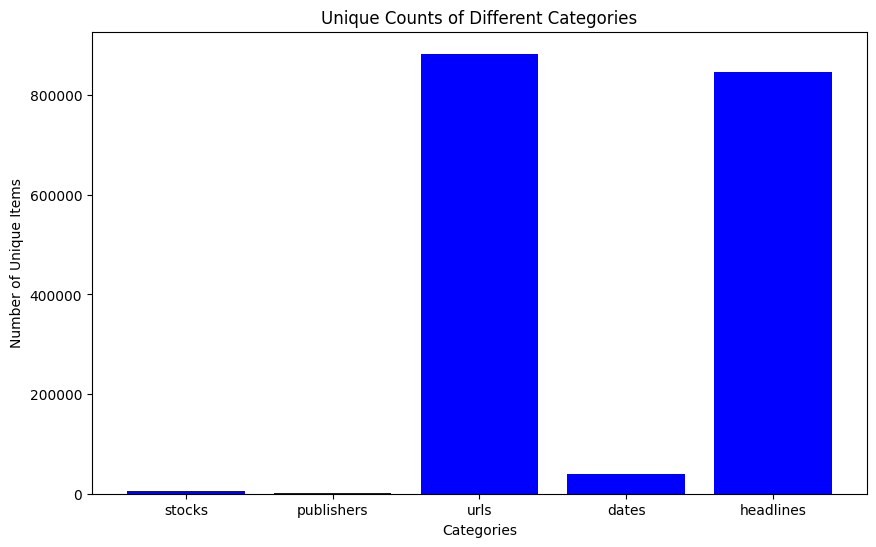

In [23]:
import matplotlib.pyplot as plt

# Calculate unique counts for each category
unique_counts = {
    'stocks': len(data['stock'].unique()),
    'publishers': len(data['publisher'].unique()),
    'urls': len(data['url'].unique()),
    'dates': len(data['date'].unique()),
    'headlines': len(data['headline'].unique())
}

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(unique_counts.keys(), unique_counts.values(), color='blue')
plt.title('Unique Counts of Different Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Unique Items')
plt.show()


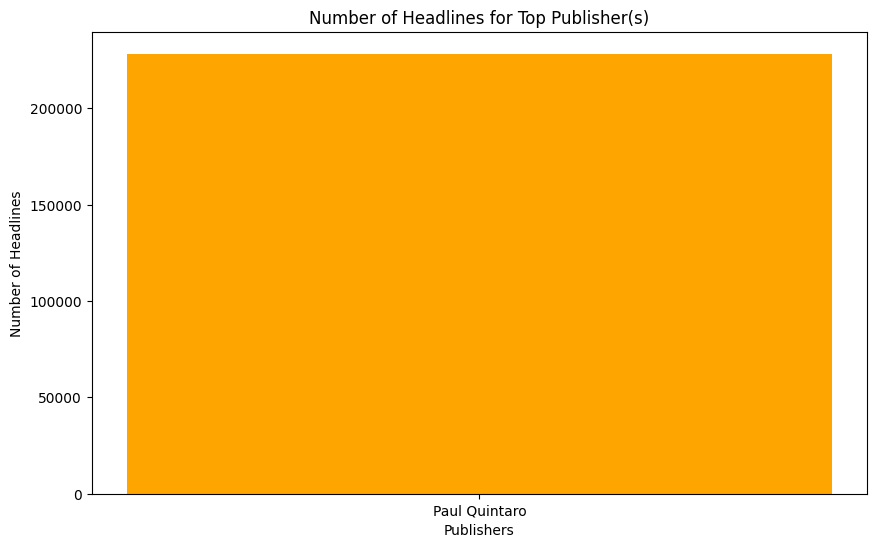

Number of publishers with the most headlines:  1


In [24]:
# Group by publisher and count the number of headlines
publisher_counts = data.groupby('publisher')['headline'].count()

# Find the maximum number of headlines
max_headlines = publisher_counts.max()

# Identify publishers with the maximum number of headlines
top_publishers = publisher_counts[publisher_counts == max_headlines]

# Visualize the number of headlines for top publishers
plt.figure(figsize=(10, 6))
plt.bar(top_publishers.index, top_publishers.values, color='orange')
plt.title('Number of Headlines for Top Publisher(s)')
plt.xlabel('Publishers')
plt.ylabel('Number of Headlines')
plt.show()

# Output the number of top publishers
print("Number of publishers with the most headlines: ", len(top_publishers))


In [ ]:
df['headline_length'] = df['headline'].apply(len)
print(df['headline_length'].describe())


### Steps to Complete the Analysis

#### 1. **Setup GitHub Repository**

1. **Create a GitHub Repository:**
   - Navigate to [GitHub](https://github.com/).
   - Click on “New Repository”.
   - Name your repository (e.g., `FNSPID-Analysis`).
   - Add a description (e.g., “Analysis of Financial News and Stock Price Integration Dataset”).
   - Initialize with a README file and .gitignore for Python.

2. **Create a New Branch:**
   - Clone the repository to your local machine if you haven't already:
     ```bash
     git clone https://github.com/yourusername/FNSPID-Analysis.git
     cd FNSPID-Analysis
     ```
   - Create and switch to the new branch:
     ```bash
     git checkout -b task-1
     ```

3. **Commit Your Work:**
   - Make sure to commit your work with descriptive messages at least three times a day.

#### 2. **Exploratory Data Analysis (EDA)**

**Load Data:**
   - Load the dataset into a pandas DataFrame:
     ```python
     import pandas as pd
     df = pd.read_csv('path_to_dataset.csv')
     ```

**Descriptive Statistics:**

1. **Textual Lengths:**
   - Calculate the length of headlines and obtain basic statistics:
     ```python
     df['headline_length'] = df['headline'].apply(len)
     print(df['headline_length'].describe())
     ```

2. **Number of Articles per Publisher:**
   - Count articles per publisher:
     ```python
     publisher_counts = df['publisher'].value_counts()
     print(publisher_counts)
     ```

3. **Publication Dates:**
   - Convert `date` column to datetime and analyze:
     ```python
     df['date'] = pd.to_datetime(df['date'], utc=True)
     df['date'].hist(bins=30)  # Plot histogram to visualize trends
     ```

**Text Analysis:**

1. **Sentiment Analysis:**
   - Use a sentiment analysis library (like VADER or TextBlob):
     ```python
     from textblob import TextBlob
     df['sentiment'] = df['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)
     ```

2. **Topic Modeling:**
   - For topic modeling, use libraries like `gensim` and `nltk`:
     ```python
     from gensim import corpora, models
     from nltk.corpus import stopwords
     from nltk.tokenize import word_tokenize

     stop_words = set(stopwords.words('english'))
     df['tokens'] = df['headline'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word.isalpha() and word not in stop_words])

     dictionary = corpora.Dictionary(df['tokens'])
     corpus = [dictionary.doc2bow(text) for text in df['tokens']]
     lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)
     topics = lda_model.print_topics()
     for topic in topics:
         print(topic)
     ```

**Time Series Analysis:**

1. **Publication Frequency:**
   - Analyze the frequency of articles over time:
     ```python
     df.set_index('date', inplace=True)
     df.resample('D').size().plot()  # Daily frequency plot
     ```

2. **Publishing Times:**
   - Extract and analyze the time of day for articles:
     ```python
     df['hour'] = df.index.hour
     df['hour'].hist(bins=24)  # Histogram of articles by hour
     ```

**Publisher Analysis:**

1. **Active Publishers:**
   - Identify the most active publishers:
     ```python
     publisher_counts = df['publisher'].value_counts()
     print(publisher_counts.head(10))
     ```

2. **Unique Domains (if applicable):**
   - Extract domains from email addresses:
     ```python
     df['domain'] = df['publisher'].apply(lambda x: x.split('@')[-1] if '@' in x else 'N/A')
     domain_counts = df['domain'].value_counts()
     print(domain_counts)
     ```

### Example Commit Messages

1. “Set up repository and create initial branch.”
2. “Add script for descriptive statistics and initial EDA.”
3. “Implement sentiment analysis and topic modeling.”
4. “Conduct time series analysis on publication frequency.”

Make sure to include clear and meaningful commit messages to track your progress effectively. If you encounter any issues or need further assistance with the analysis, feel free to ask!

Certainly! Below is a Python code sample that performs Exploratory Data Analysis (EDA) on the Financial News and Stock Price Integration Dataset. The code covers descriptive statistics, text analysis (sentiment analysis and topic modeling), time series analysis, and publisher analysis.

### Prerequisites

Before running the code, ensure you have the necessary libraries installed:
```bash
pip install pandas matplotlib seaborn textblob nltk gensim
```

### Python Code for EDA

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora, models
import nltk

# Download NLTK data if not already available
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
file_path = 'path_to_your_dataset.csv'  # Replace with your dataset path
df = pd.read_csv(file_path)

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], utc=True)

# Descriptive Statistics
print("Descriptive Statistics:")
print("Headline Length Statistics:")
df['headline_length'] = df['headline'].apply(len)
print(df['headline_length'].describe())

print("\nNumber of Articles per Publisher:")
publisher_counts = df['publisher'].value_counts()
print(publisher_counts)

print("\nPublication Date Trends:")
df['date'].hist(bins=30, edgecolor='black')
plt.title('Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

# Text Analysis
print("\nSentiment Analysis:")
df['sentiment'] = df['headline'].apply(lambda x: TextBlob(x).sentiment.polarity)
print(df[['headline', 'sentiment']].head())

# Plot sentiment distribution
sns.histplot(df['sentiment'], bins=20, kde=True)
plt.title('Sentiment Distribution of Headlines')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

print("\nTopic Modeling:")
# Tokenize and preprocess headlines
stop_words = set(stopwords.words('english'))
df['tokens'] = df['headline'].apply(lambda x: [word for word in word_tokenize(x.lower()) if word.isalpha() and word not in stop_words])

# Create dictionary and corpus
dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# Apply LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)
topics = lda_model.print_topics()
print("Top 5 Topics:")
for topic in topics:
    print(topic)

# Time Series Analysis
print("\nTime Series Analysis:")
# Frequency of articles by day
df.resample('D').size().plot()
plt.title('Daily Article Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

# Hourly publication trends
df['hour'] = df.index.hour
sns.histplot(df['hour'], bins=24, kde=True)
plt.title('Hourly Distribution of Articles')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.show()

# Publisher Analysis
print("\nPublisher Analysis:")
# Most active publishers
most_active_publishers = publisher_counts.head(10)
print("Top 10 Most Active Publishers:")
print(most_active_publishers)

# If publishers are email addresses, extract and analyze domains
df['domain'] = df['publisher'].apply(lambda x: x.split('@')[-1] if '@' in x else 'N/A')
domain_counts = df['domain'].value_counts()
print("\nDomains Count:")
print(domain_counts.head(10))
```

### Explanation

1. **Load and Prepare Data:**
   - Reads the dataset into a DataFrame and converts the `date` column to datetime.

2. **Descriptive Statistics:**
   - Calculates and displays basic statistics for headline lengths.
   - Counts articles per publisher and plots publication dates over time.

3. **Text Analysis:**
   - Performs sentiment analysis using `TextBlob` and visualizes the sentiment distribution.
   - Prepares text data for topic modeling using `gensim`, and applies LDA to identify common topics.

4. **Time Series Analysis:**
   - Analyzes the frequency of articles over time and the distribution of publication hours.

5. **Publisher Analysis:**
   - Identifies the most active publishers.
   - If publishers are email addresses, extracts and counts unique domains.

Make sure to replace `path_to_your_dataset.csv` with the actual path to your dataset. Adjust the code as necessary based on the specific format and contents of your dataset.